<H1>PREDICTING LOAN DEFAULTS USING MACHINE LEARNING ALGORITHMS</H1>

> Indented block



<h2>Overview of the data and problem statement</h2>

The dataset has a total of 100,000 rows, each of which contains details about a loan and the customer who received that loan. Information about whether or not a customer defaulted on a loan has been provided for 90,000 of the cases, while this information has not been provided for the remaining 10,000 cases. I used the 90,000 rows for which I have complete information to train and test the machine learning models. I have then used that model to predict whether or not a default occurred for the remaining 10,000 loans.

<b>The columns contained in the dataset are:</b>

• loan_id – The unique ID value for each loan.<br>
• loan_default – Whether or not the customer defaulted on the loan (1 = did default, 0 = did not default). This is the primary outcome variable that you are trying to predict in this project.<br>
• loan_amount – The total amount of money (in U.S. dollars) that was loaned to the customer,<br>
• asset_cost – The total cost (in U.S. dollars) of the item for which the customer sought a loan.<br>
• loan_to_value – The percentage of the total cost of the item that was paid for with the loan.<br>
• customer_age – The age of the customer (in years).<br>
• self_employed – Whether or not the customer is self-employed (1 = self-employed, 0 = not self-employed).<br>
• voter_status_shared – Whether or not the customer voluntarily shared his or her voter status as part of the loan application process (1 = shared, 0 = did not share).<br>
• drivers_license_shared – Whether or not the customer voluntarily shared his or her driver’s license information as part of the loan application process (1 = shared, 0 = did not share).<br>
• passport_shared – Whether or not the customer voluntarily shared his or her passport information as part of the loan application process (1 = shared, 0 = did not share).<br>
• credit_score – The customer’s FICO credit score at the time the loan was disbursed.<br>
• credit_inquiries – The total number of times the customer’s credit has been checked as part of a loan application.<br>
• total_credit_accounts – The total number of credit accounts that the customer has had in his or her lifetime.<br>
• credit_history_length – The total length (in years) that the customer has had a credit history.<br>
• active_credit_accounts – The total number of active credit accounts that the customer had at the time when the loan was disbursed.<br>
• overdue_credit_accounts – The total number of credit accounts that the customer had that were overdue at the time when the loan was disbursed.<br>
• average_credit_account_age – The average age of the customer’s credit accounts (in years).<br>
• total_current_balance – The total amount of money (in U.S. dollars) that the customer currently owes to creditors.<br>
• total_disbursed_loans – The total amount of money (in U.S. dollars) that the customer has received in loans during his or her lifetime.<br>
• recent_loans – The total number of new loans that the customer has had the past six months.<br>
• recent_defaulted_loans – The total number of loans on which the customer defaulted in the past six months.

<H3>Import Libraries</H3>

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sklm
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

<H3>Load Dataset</H3>

In [4]:
#load the CSV file into a pandas dataframe
df = pd.read_csv('Project 01 - Data.csv', index_col='loan_id')

In [5]:
df.head(10)

,loan_amount,asset_cost,loan_to_value,customer_age,self_employed,voter_status_shared,drivers_license_shared,passport_shared,credit_score,credit_inquiries,total_credit_accounts,credit_history_length,active_credit_accounts,overdue_credit_accounts,average_credit_account_age,total_current_balance,total_disbursed_loans,recent_loans,recent_defaulted_loans,loan_default
loan_id,,,,,,,,,,,,,,,,,,,,
1,53800,65300,0.824,40,1,1,0.0,1.0,762.0,1.0,2.0,4.250,2.0,0.0,2.333,2200.0,67200.0,1.0,0.0,0.0
2,58900,71000,0.830,23,0,0,0.0,0.0,680.0,2.0,9.0,1.250,4.0,0.0,0.667,26800.0,52300.0,3.0,0.0,0.0
3,59000,75100,0.786,43,0,0,0.0,0.0,771.0,0.0,6.0,1.750,3.0,0.0,1.167,129700.0,172200.0,2.0,0.0,0.0
4,58000,68000,0.853,42,1,0,0.0,0.0,692.0,0.0,3.0,0.500,2.0,0.0,0.167,250300.0,700000.0,2.0,0.0,0.0
5,57900,71900,0.805,49,1,1,0.0,0.0,657.0,0.0,4.0,14.750,3.0,0.0,5.000,301600.0,327000.0,1.0,0.0,0.0
6,69100,92800,0.745,30,1,0,0.0,0.0,617.0,0.0,2.0,2.250,2.0,0.0,1.000,100900.0,114600.0,1.0,1.0,0.0
7,69500,88300,0.787,39,0,0,0.0,0.0,712.0,0.0,24.0,5.750,3.0,0.0,1.333,28100.0,164400.0,0.0,0.0,0.0
8,40900,72200,0.566,52,0,0,0.0,0.0,684.0,0.0,14.0,9.750,6.0,0.0,2.333,606700.0,524500.0,1.0,0.0,0.0
9,52900,68500,0.772,40,1,0,0.0,0.0,510.0,0.0,2.0,1.917,1.0,1.0,1.417,24300.0,25000.0,0.0,0.0,1.0


In [6]:
df.shape

(82832, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82832 entries, 1 to 82832
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 82832 non-null  int64  
 1   asset_cost                  82832 non-null  int64  
 2   loan_to_value               82832 non-null  float64
 3   customer_age                82832 non-null  int64  
 4   self_employed               82832 non-null  int64  
 5   voter_status_shared         82832 non-null  int64  
 6   drivers_license_shared      82831 non-null  float64
 7   passport_shared             82831 non-null  float64
 8   credit_score                82831 non-null  float64
 9   credit_inquiries            82831 non-null  float64
 10  total_credit_accounts       82831 non-null  float64
 11  credit_history_length       82831 non-null  float64
 12  active_credit_accounts      82831 non-null  float64
 13  overdue_credit_accounts     828

In [8]:
df.describe()

,loan_amount,asset_cost,loan_to_value,customer_age,self_employed,voter_status_shared,drivers_license_shared,passport_shared,credit_score,credit_inquiries,total_credit_accounts,credit_history_length,active_credit_accounts,overdue_credit_accounts,average_credit_account_age,total_current_balance,total_disbursed_loans,recent_loans,recent_defaulted_loans,loan_default
count,82832.000000,82832.000000,82832.000000,82832.000000,82832.000000,82832.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,8.283100e+04,8.283100e+04,82831.000000,82831.000000,82831.000000
mean,54568.385407,74723.597161,0.737279,37.313152,0.549329,0.117817,0.025136,0.002837,626.628460,0.341321,5.290881,2.873168,2.237737,0.346271,1.523033,3.643834e+05,4.823957e+05,0.773539,0.215644,0.199829
std,12765.814202,18293.115161,0.109806,9.381349,0.497564,0.322393,0.156538,0.053189,143.117038,0.928379,6.752616,2.791238,2.342260,0.781009,1.365571,1.366046e+06,3.856841e+06,1.277353,0.549957,0.399874
min,13700.000000,37000.000000,0.124000,21.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,47300.000000,65300.000000,0.681000,30.000000,0.000000,0.000000,0.000000,0.000000,574.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.667000,3.600000e+03,1.870000e+04,0.000000,0.000000,0.000000
50%,54000.000000,70100.000000,0.758000,36.000000,1.000000,0.000000,0.000000,0.000000,673.000000,0.000000,3.000000,2.083000,2.000000,0.000000,1.083000,4.100000e+04,7.400000e+04,0.000000,0.000000,0.000000
75%,60400.000000,77500.000000,0.822000,44.000000,1.000000,0.000000,0.000000,0.000000,719.000000,0.000000,7.000000,3.583000,3.000000,0.000000,1.917000,2.323000e+05,3.550000e+05,1.000000,0.000000,0.000000
max,332000.000000,459600.000000,0.937000,65.000000,1.000000,1.000000,1.000000,1.000000,850.000000,36.000000,453.000000,39.000000,43.000000,25.000000,24.333000,7.560340e+07,1.000000e+09,28.000000,20.000000,1.000000


<H3>Data Understanding</H3>

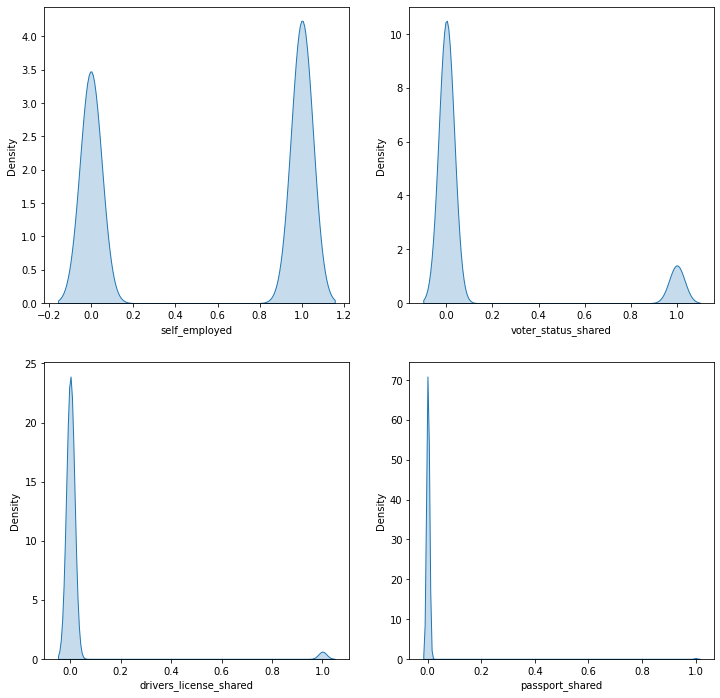

In [9]:
#Visualize the categorial variables (features)
rows, cols = 2, 2
df_col_index = 4
fig, ax = plt.subplots(rows, cols, figsize=(12,12))
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True)
    df_col_index += 1

Except credit score, other categorical features seems to be imbalanced

In [10]:
#Drop the required columns
df = df.drop(['passport_shared', 'drivers_license_shared', 'voter_status_shared', 'self_employed'], axis = 1)

In [11]:
df.shape

(82832, 16)

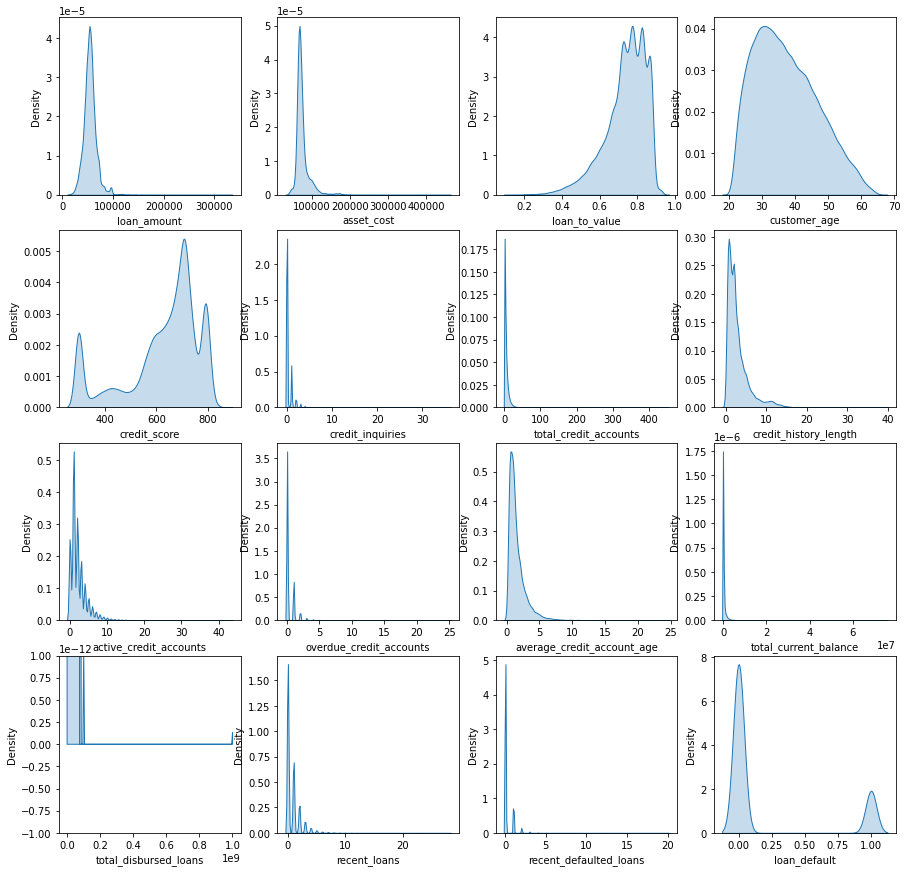

In [12]:
#generate kernel density estimate (KDE) plots for the remaining 16 variables in the dataset
rows, cols = 4, 4
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True)
    df_col_index += 1

Most of the features are observed to be right-skewed, except 'credit_score' and 'loan_to_value'.

<H3>Data Preprocessing</H3>

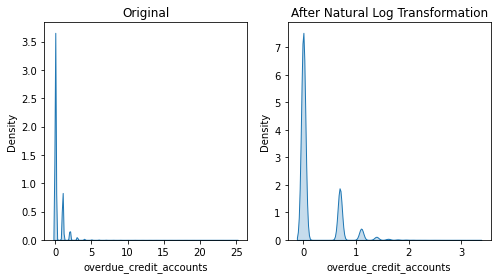

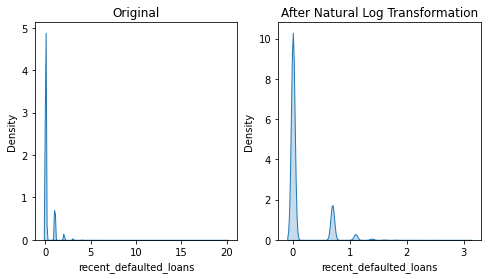

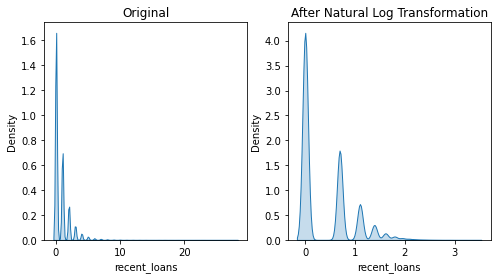

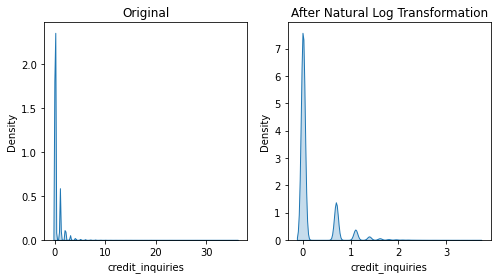

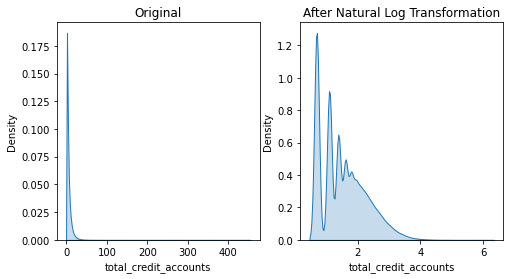

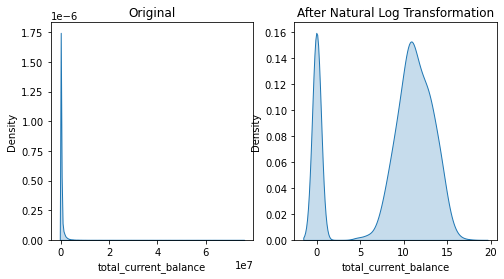

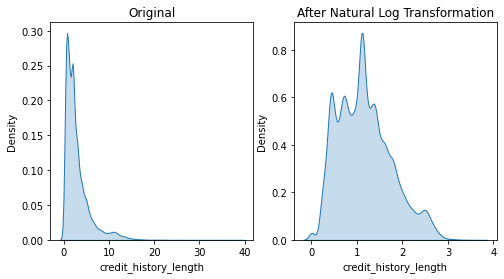

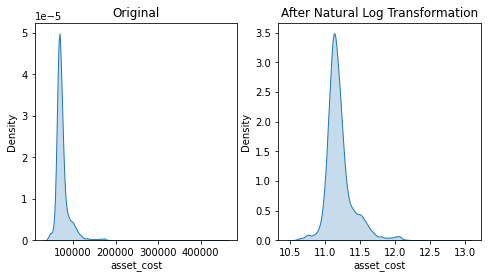

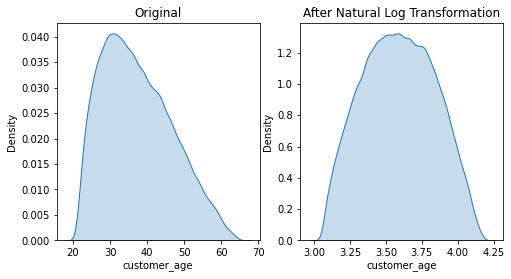

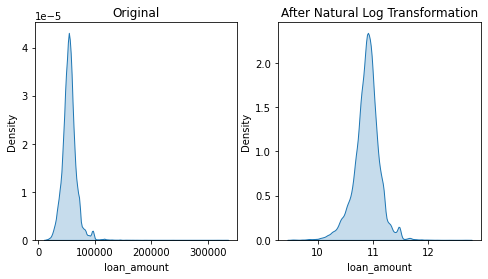

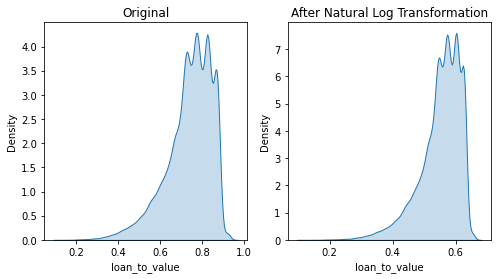

In [13]:
#Apply natural log transformation to the left-skewed variables in order to make the distribution 'more' normal.

#DATA PREPARATION
 
from math import log
 
#apply natural log transformations to skewed variables
overdue_credit_accounts_original = df['overdue_credit_accounts'].copy() #save a copy of the original (untransformed) serum insulin levels
df['overdue_credit_accounts'] = [math.log(x + 1) for x in df['overdue_credit_accounts']]
 
recent_defaulted_loans_original = df['recent_defaulted_loans'].copy()
df['recent_defaulted_loans'] = [math.log(x + 1) for x in df['recent_defaulted_loans']]
 
recent_loans_original = df['recent_loans'].copy()
df['recent_loans'] = [math.log(x + 1) for x in df['recent_loans']]
 
credit_inquiries_original = df['credit_inquiries'].copy()
df['credit_inquiries'] = [math.log(x + 1) for x in df['credit_inquiries']]
 
average_credit_account_age_original = df['average_credit_account_age'].copy()
df['average_credit_account_age'] = [math.log(x + 1) for x in df['average_credit_account_age']]
 
total_credit_accounts_original = df['total_credit_accounts'].copy()
df['total_credit_accounts'] = [math.log(x + 1) for x in df['total_credit_accounts']]
 
total_current_balance_original = df['total_current_balance'].copy()
df['total_current_balance'] = [math.log(x + 1) for x in df['total_current_balance']]
 
loan_amount_original = df['loan_amount'].copy()
df['loan_amount'] = [math.log(x) for x in df['loan_amount']]
 
credit_history_length_original = df['credit_history_length'].copy()
df['credit_history_length'] = [math.log(x+1) for x in df['credit_history_length']]
 
loan_to_value_original = df['loan_to_value'].copy()
df['loan_to_value'] = [math.log(x+1) for x in df['loan_to_value']]
 
asset_cost_original = df['asset_cost'].copy()
df['asset_cost'] = [math.log(x) for x in df['asset_cost']]
 
customer_age_original = df['customer_age'].copy()
df['customer_age'] = [math.log(x) for x in df['customer_age']]
 
#plot the untransformed and transformed distributions for the "overdue_credit_accounts" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(overdue_credit_accounts_original, ax=ax[0], fill=True)
sns.kdeplot(df['overdue_credit_accounts'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "recent_defaulted_loans" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(recent_defaulted_loans_original, ax=ax[0], fill=True)
sns.kdeplot(df['recent_defaulted_loans'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "recent_loans" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(recent_loans_original, ax=ax[0], fill=True)
sns.kdeplot(df['recent_loans'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "credit_inquiries" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(credit_inquiries_original, ax=ax[0], fill=True)
sns.kdeplot(df['credit_inquiries'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "total_credit_accounts" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(total_credit_accounts_original, ax=ax[0], fill=True)
sns.kdeplot(df['total_credit_accounts'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "total_current_balance" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(total_current_balance_original, ax=ax[0], fill=True)
sns.kdeplot(df['total_current_balance'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "credit_history_length" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(credit_history_length_original, ax=ax[0], fill=True)
sns.kdeplot(df['credit_history_length'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "asset_cost" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(asset_cost_original, ax=ax[0], fill=True)
sns.kdeplot(df['asset_cost'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "customer_age" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(customer_age_original, ax=ax[0], fill=True)
sns.kdeplot(df['customer_age'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "loan_amount" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(loan_amount_original, ax=ax[0], fill=True)
sns.kdeplot(df['loan_amount'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')
 
#plot the untransformed and transformed distributions for the "loan_to_value" variable
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(loan_to_value_original, ax=ax[0], fill=True)
sns.kdeplot(df['loan_to_value'], ax=ax[1], fill=True)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')

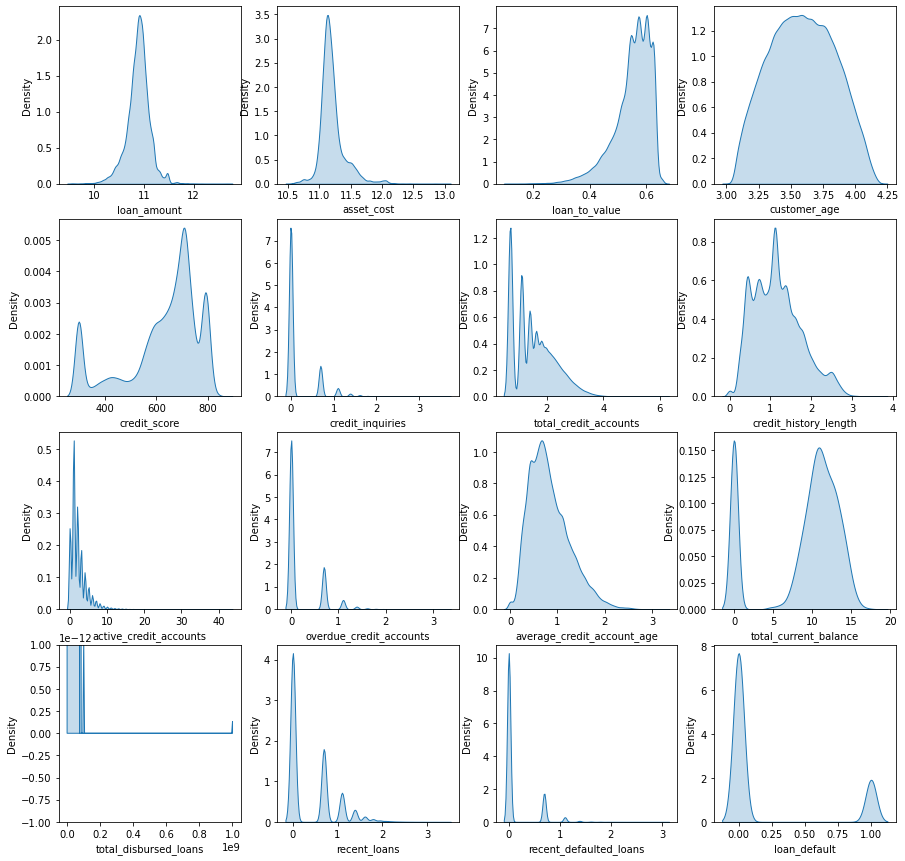

In [14]:
#generate kernel density estimate (KDE) plots for the remaining 16 variables in the dataset after transformation
rows, cols = 4, 4
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True)
    df_col_index += 1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82832 entries, 1 to 82832
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 82832 non-null  float64
 1   asset_cost                  82832 non-null  float64
 2   loan_to_value               82832 non-null  float64
 3   customer_age                82832 non-null  float64
 4   credit_score                82831 non-null  float64
 5   credit_inquiries            82831 non-null  float64
 6   total_credit_accounts       82831 non-null  float64
 7   credit_history_length       82831 non-null  float64
 8   active_credit_accounts      82831 non-null  float64
 9   overdue_credit_accounts     82831 non-null  float64
 10  average_credit_account_age  82831 non-null  float64
 11  total_current_balance       82831 non-null  float64
 12  total_disbursed_loans       82831 non-null  float64
 13  recent_loans                828

In [16]:
df.describe()

,loan_amount,asset_cost,loan_to_value,customer_age,credit_score,credit_inquiries,total_credit_accounts,credit_history_length,active_credit_accounts,overdue_credit_accounts,average_credit_account_age,total_current_balance,total_disbursed_loans,recent_loans,recent_defaulted_loans,loan_default
count,82832.000000,82832.000000,82832.000000,82832.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,82831.000000,8.283100e+04,82831.000000,82831.000000,82831.000000
mean,10.880984,11.198932,0.550210,3.588048,626.628460,0.186370,1.535334,1.164677,2.237737,0.205162,0.822731,9.009134,4.823957e+05,0.407617,0.135220,0.199829
std,0.230838,0.201096,0.065898,0.250424,143.117038,0.395362,0.723467,0.587124,2.342260,0.381839,0.426593,4.881348,3.856841e+06,0.528874,0.308626,0.399874
min,9.525151,10.518673,0.116894,3.044522,300.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,10.764266,11.086747,0.519389,3.401197,574.000000,0.000000,1.098612,0.693147,1.000000,0.000000,0.511026,8.188967,1.870000e+04,0.000000,0.000000,0.000000
50%,10.896739,11.157678,0.564177,3.583519,673.000000,0.000000,1.386294,1.125903,2.000000,0.000000,0.733809,10.621352,7.400000e+04,0.000000,0.000000,0.000000
75%,11.008744,11.258033,0.599935,3.784190,719.000000,0.000000,2.079442,1.522354,3.000000,0.000000,1.070556,12.355789,3.550000e+05,0.693147,0.000000,0.000000
max,12.712890,13.038112,0.661140,4.174387,850.000000,3.610918,6.118097,3.688879,43.000000,3.258097,3.232108,18.141012,1.000000e+09,3.367296,3.044522,1.000000


<H3>Exploratory Data Analysis</H3>

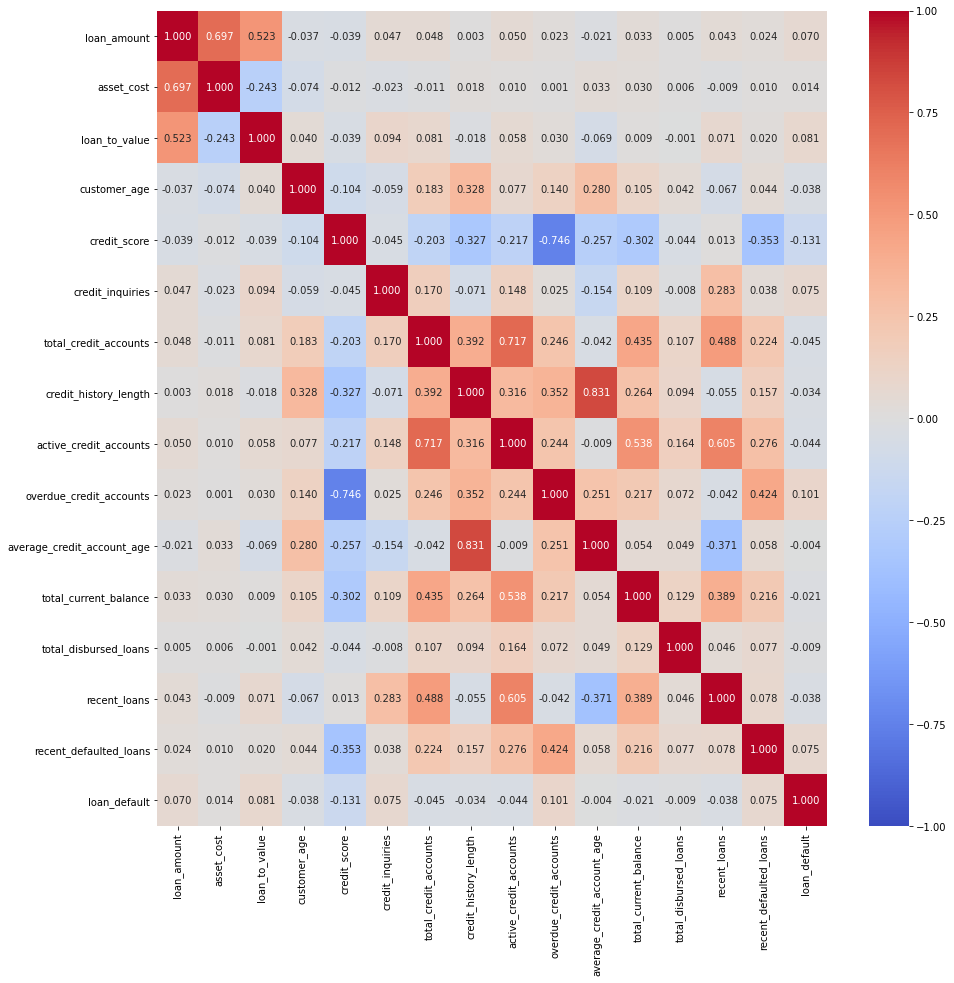

In [17]:
#Plot a correlation matrix heatmap for all features
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

Some of the features are observed to be highly correlated with others.

In [18]:
#Dropping correlated features
cols = ['total_disbursed_loans', 'average_credit_account_age']
df = df.drop(columns = cols, axis = 1)

In [19]:
df.shape

(82832, 14)

<H3>Create the validation dataset with the incomplete (missing) labels</H3>

In [20]:
#create a dataframe containing only those rows for which a loan default prediction needs to be made
df_predict = df[pd.isnull(df.loan_default) == True].copy()
#remove all incomplete rows from the 'df' dataframe
df = df[pd.isnull(df.loan_default) == False].copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82831 entries, 1 to 82831
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amount              82831 non-null  float64
 1   asset_cost               82831 non-null  float64
 2   loan_to_value            82831 non-null  float64
 3   customer_age             82831 non-null  float64
 4   credit_score             82831 non-null  float64
 5   credit_inquiries         82831 non-null  float64
 6   total_credit_accounts    82831 non-null  float64
 7   credit_history_length    82831 non-null  float64
 8   active_credit_accounts   82831 non-null  float64
 9   overdue_credit_accounts  82831 non-null  float64
 10  total_current_balance    82831 non-null  float64
 11  recent_loans             82831 non-null  float64
 12  recent_defaulted_loans   82831 non-null  float64
 13  loan_default             82831 non-null  float64
dtypes: float64(14)
memory 

<H3>Split the data into testing and training data</H3>

In [23]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

ValueError: ignored

In [ ]:
#split the data into training and testing sets
#df_train, df_test = train_test_split(df.copy(), test_size=0.2, shuffle=True, random_state=12345)
#predictors = ['loan_amount', 'asset_cost', 'loan_to_value', 'customer_age', 'credit_score', 'credit_inquiries', 'total_credit_accounts', 'credit_history_length', 'active_credit_accounts', 'overdue_credit_accounts', 'total_current_balance', 'recent_loans', 'recent_defaulted_loans']
#df[predictors] = scaler.fit_transform(df[predictors])

In [ ]:
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler(feature_range=(0,1))
scaler = RobustScaler(copy=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# from sklearn.decomposition import PCA
# kpca = PCA(n_components=5)
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)

<H3>Run Machine Learning Classification Models</H3>

<h4>Logistic Regression Classifier</h4>

In [ ]:
#train a logistic regression classifier
classifier = LogisticRegression(class_weight= 'balanced', max_iter=500)
classifier.fit(X_train, y_train)

In [ ]:
#generate predictions, and save them in a new column named "Has_Diabetes_Predicted" in the testing dataframe
#df_test['loan_default_predicted'] = model.predict(df_test[predictors])

#view actual and predicted values for the first 20 women in the testing set
#df_test[['loan_default', 'loan_default_predicted']].tail(20)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

<H4>Evaluation Metrics - Logistic</H4>

In [ ]:
# #define a function that generates a ROC curve
# def generate_roc_curve(actual, predicted_probabilities):
#     fpr, tpr, _ = roc_curve(actual, predicted_probabilities)
#     auc = roc_auc_score(actual, predicted_probabilities)
#     plt.plot(fpr, tpr, 'b-', lw=2, label='Area Under Curve (AUC): {0:.3f}'.format(auc))
#     plt.plot([0, 1], [0, 1], 'r--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc=4)
#     plt.show()

# #compute predicted probabilities that each woman in the testing set has diabetes
# predicted_probabilities = model.predict_proba(df_test[predictors])[::,1]

# #generate a ROC curve for the logistic regression classifier
# generate_roc_curve(df_test['loan_default'], predicted_probabilities)

In [ ]:
#define a function that prints a confusion matrix and other performance metrics
def print_metrics(actual, predicted):
  tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
  total_predictions = tn + fp + fn + tp
  print(' True positive: {} ({:.2f}%)'.format(tp, tp / total_predictions * 100))
  print(' True negative: {} ({:.2f}%)'.format(tn, tn / total_predictions * 100))
  print('False positive: {} ({:.2f}%)'.format(fp, fp / total_predictions * 100))
  print('False negative: {} ({:.2f}%)\n'.format(fn, fn / total_predictions * 100))
  target_names=['loan rejected', 'loan approved']
  print(classification_report(actual, predicted, target_names=target_names, digits=4))

#show the performance of the model on the testing data
#print_metrics(df_test['loan_default'], df_test['loan_default_predicted'])
print_metrics(y_test, y_pred)

<H4>CART Classifier</H4>

In [ ]:
# y = df['loan_default'].values # Converting target variable to 1-dimensional numpy array or vector
# df.drop(['loan_default'], axis=1, inplace=True)

In [ ]:
# X = df.values # Converting dataframe columns to matrix of features (numpy array)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    class_weight='balanced', 
                                    max_features='sqrt', 
                                    splitter='random',
                                    min_samples_leaf=2,
                                    min_samples_split=12) # Initializing the model object
classifier.fit(X_train, y_train) # training the model

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'criterion':['gini', 'entropy'],
#                'splitter':['best', 'random'],
#                'max_depth':[3,4,5],
#                'min_samples_split':[2,4,6,8,10,12,14],
#                'min_samples_leaf':[1,2,4,6,8,10,12,14]}]
# grid_search = GridSearchCV(estimator=classifier, 
#                            param_grid=parameters,
#                            scoring='accuracy',
#                            cv=5,
#                            n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print('Best Accuracy: {:.2f}'.format(best_accuracy * 100))
# print('Best Parameters: ', best_parameters)

<h4>CART Evaluation Metrics</h4>

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy: {:.2f}'.format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Fix the code for ROC Curve

import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
# Get the true positive, false positive, and thresholds.
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot FPR against TPR
plt.figure(figsize=(14, 6))
plt.title('AUC Plot')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Set the random state for reproducibility
 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
 
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
 
from sklearn.metrics import plot_roc_curve
from sklearn import svm
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X,y)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X, y, ax=ax, alpha=0.8)
 
plt.show()

<H4>Random Forest Classifier</H4>

In [ ]:
# X = df.values # Converting dataframe columns to matrix of features (numpy array)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=400, max_depth=5, class_weight='balanced')
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
#from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(classifier, X, y, n_jobs=-1, cv=10, scoring='accuracy')
#print('Accuracy: {:.2f}'.format(accuracies.mean() * 100))
#print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)

In [ ]:
import sklearn.metrics as metrics
print_metrics(y_test, y_pred)

K Nearest Neighbor

In [ ]:
#train a k-nearest neighbors (KNN) classifier
import sklearn.metrics as metrics
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

#evaluate the performance of the KNN classifier using the test set
#df_test['loan_default_predicted'] = model.predict(df_test[predictors])

#show the performance of the model on the testing data
#print_metrics(df_test['loan_default'], df_test['loan_default_predicted'])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print_metrics(y_test, y_pred)

In [ ]:
# #generate predictions, and save them in a new column named "Has_Diabetes_Predicted" in the testing dataframe
# df_test['loan_default_predicted'] = model.predict(df_test[predictors])

# #view actual and predicted values for the first 20 women in the testing set
# df_test[['loan_default', 'loan_default_predicted']].tail(20)

XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'learning_rate':[0.1,0.2,0.3],
#                'n_estimators':[100, 200, 300],
#                'max_depth':[3,4,5],
#                'reg_alpha':[0, 1, 100]}]
# grid_search = GridSearchCV(estimator=classifier, 
#                            param_grid=parameters,
#                            scoring='accuracy',
#                            cv=5,
#                            n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print('Best Accuracy: {:.2f}'.format(best_accuracy * 100))
# print('Best Parameters: ', best_parameters)

In [ ]:
# from catboost import CatBoostClassifier
# classifier = CatBoostClassifier(n_estimators=300, depth=5)
# classifier.fit(X_train, y_train)

In [ ]:
# from lightgbm import LGBMClassifier
# classifier = LGBMClassifier(n_estimators=300, max_depth=5)
# classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
print_metrics(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
results = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
new_dataset = pd.DataFrame(results, columns=['True', 'Predicted'])
new_dataset.head(50)

Artificial Neural Network

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

def build_model():
    classifier = tf.keras.models.Sequential()
    classifier.add(tf.keras.layers.Dense(8, activation='relu'))
    classifier.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
classifier = build_model()
classifier.fit(X_train, y_train, epochs=30, batch_size=50, verbose=1)

In [ ]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
y_pred = classifier.predict(X_test).ravel()
# Get the true positive, false positive, and thresholds.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

# Plot FPR against TPR
plt.figure(figsize=(14, 6))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('AUC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.3
y_pred = y_pred.reshape(len(y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
print('{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

In [ ]:
print_metrics(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
results = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
new_dataset = pd.DataFrame(results, columns=['True', 'Predicted'])
new_dataset.head(50)

Predicting 10000 Instances Without Labels

In [ ]:
df_predict.drop('loan_default', axis=1, inplace=True)

In [ ]:
loan_default = classifier.predict(scaler.transform(df_predict))
loan_default = loan_default > 0.3
loan_default = loan_default.reshape(len(loan_default))

In [ ]:
loan_default = 1 * loan_default

In [ ]:
df_predict['loan_default'] = loan_default

In [ ]:
df_predict.head(30)